Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
#import tensorflow_datasets as tfds
import glob
import pickle 
import cv2
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import seaborn as sb
sb.set()
from tensorflow.keras import layers

In [7]:
datadir=Path("G:\study\\bse\\PIAIC\\q2\\archive\\flowers")

flowers = []
features = []
labels = []
for dir in datadir.iterdir():
    flowers.append(dir.name)
    print(dir.name)
    for img_path in dir.iterdir():
        if img_path.name.endswith("jpg"):
            labels.append(dir.name)
            img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (150,150))
            features.append(img_arr)

daisy
dandelion
flowers
rose
sunflower
tulip


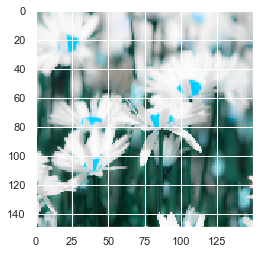

In [9]:
plt.imshow(features[100])
plt.show()

In [33]:
features = np.array(features)

labels = np.array(labels)
np.savez_compressed("flower_data", features, labels)

MemoryError: 

In [26]:
def prep(features, labels):
    features=features/255.0
    features=features.reshape(len(features), 150,150,3)
    one_hot=LabelBinarizer()
    labels=one_hot.fit_transform(labels)
    return features, labels, one_hot

In [18]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
x,y,one_hot=prep(features, labels)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)

MemoryError: 

In [10]:
training_model = model.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
21/21 [==============================] - 111s 5s/step - loss: 1.6017 - accuracy: 0.2707
Epoch 2/50
21/21 [==============================] - 106s 5s/step - loss: 1.1958 - accuracy: 0.4952
Epoch 3/50
21/21 [==============================] - 105s 5s/step - loss: 1.0959 - accuracy: 0.5557
Epoch 4/50
21/21 [==============================] - 108s 5s/step - loss: 1.0171 - accuracy: 0.5957
Epoch 5/50
21/21 [==============================] - 107s 5s/step - loss: 0.8949 - accuracy: 0.6360
Epoch 6/50
21/21 [==============================] - 105s 5s/step - loss: 0.8585 - accuracy: 0.6611
Epoch 7/50
21/21 [==============================] - 104s 5s/step - loss: 0.7750 - accuracy: 0.6951
Epoch 8/50
21/21 [==============================] - 107s 5s/step - loss: 0.7269 - accuracy: 0.7215
Epoch 9/50
21/21 [==============================] - 104s 5s/step - loss: 0.7063 - accuracy: 0.7196
Epoch 10/50
21/21 [==============================] - 104s 5s/step - loss: 0.5635 - accuracy: 0.7847
Epoch 11/

In [11]:
model.save("flowermodel.h5")

In [12]:
def plot_accuracy(training_model):
    plt.figure(figsize=(10,5))
    plt.plot(training_model.history["accuracy"], label="Accuracy", color = "b")
    plt.plot(training_model.history["loss"], label = "Loss", color = "r")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

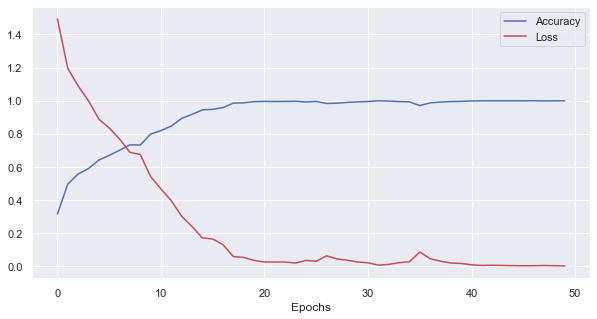

In [13]:
plot_accuracy(training_model)

In [14]:
model=tf.keras.models.load_model("flowermodel.h5")

In [15]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 17s 296ms/step - loss: 2.6700 - accuracy: 0.6676


[2.6699633598327637, 0.6676300764083862]

In [16]:
model.predict(x_test).sum()

1730.0